<a href="https://colab.research.google.com/github/MadhaviSusarla/MadhaviSusarla/blob/main/NETFLIX__RECOMMENDATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
1274023,1241220,5.0
1274024,2617880,2.0
1274025,1378972,5.0
1274026,1494683,4.0


In [ ]:
dataset['Rating'] = dataset['Rating'].astype(float)

In [ ]:
dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [ ]:
dataset.shape

(152869, 2)

In [ ]:
dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
p = dataset.groupby('Rating')['Rating'].agg(['count'])
p

,count
Rating,
1.0,7044
2.0,14391
3.0,42489
4.0,55597
5.0,33317


In [ ]:
movie_count = dataset.isnull().sum()[1]

movie_count

31

In [ ]:
cust_count = dataset['Cust_Id'].nunique()-movie_count

cust_count

303715

In [ ]:
rating_count = dataset['Cust_Id'].count() - movie_count

rating_count

1273997

Text(0.5, 1.0, 'Total pool: 31 Movies, 303715 customers, 1273997 ratings given')

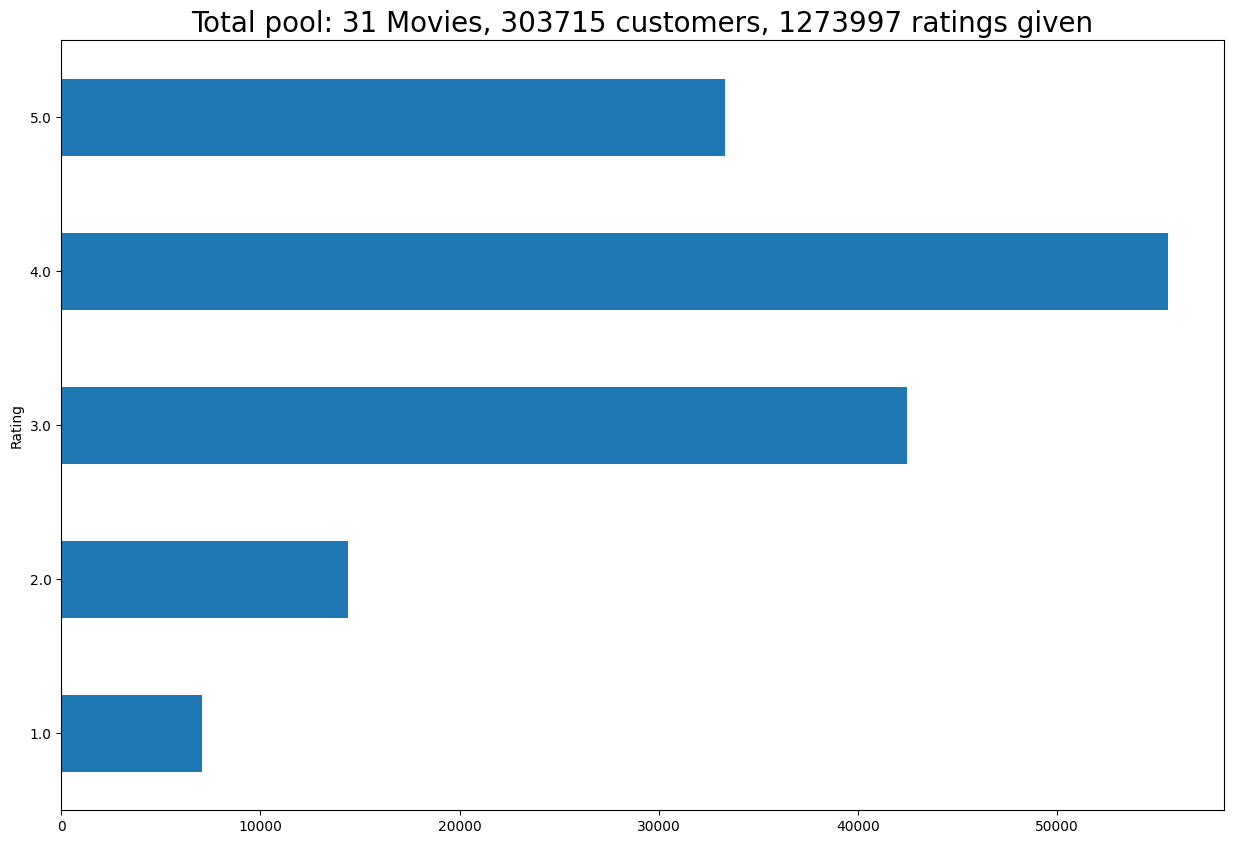

In [ ]:
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)

In [ ]:
df_nan = pd.DataFrame(pd.isnull(dataset.Rating))

df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [ ]:
df_nan = df_nan[df_nan['Rating'] == True]
df_nan.shape

(283, 1)

In [ ]:
df_nan = df_nan.reset_index()
df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [ ]:
movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):

    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [  1.   1.   1. ... 283. 283. 283.]
Length: 1273745


In [ ]:
dataset = dataset[pd.notnull(dataset['Rating'])]#movies count so nan
dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset examples-')
dataset.head()

-Dataset examples-


<ipython-input-21-69e1cb4de704>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Movie_Id'] = movie_np.astype(int)
<ipython-input-21-69e1cb4de704>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [ ]:
dataset.shape

(1273745, 3)

In [ ]:
f = ['count','mean']

In [ ]:
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1771.0


In [ ]:
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
#                                           6                       <  5
#drop_cust_list[3,4]
print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 5.0


In [ ]:
print(f'Original Shape: {dataset.shape}')

Original Shape: (1273745, 3)


In [ ]:
dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (790607, 3)


In [ ]:
dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
699,44937,5.0,3
700,656399,4.0,3
701,439011,1.0,3


In [ ]:
df_p = pd.pivot_table(dataset,values='Rating',index='Cust_Id',columns='Movie_Id')
print(df_p.shape)

(92512, 85)


In [ ]:
df_p.head()

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,256,257,262,268,269,270,273,275,281,283
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5.0
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN


In [ ]:
df_title = pd.read_csv('/content/movies.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])

df_title.set_index('Movie_Id', inplace = True)

print (df_title.head(10))

                                        Year  \
Movie_Id                                       
movieId                                title   
1                           Toy Story (1995)   
2                             Jumanji (1995)   
3                    Grumpier Old Men (1995)   
4                   Waiting to Exhale (1995)   
5         Father of the Bride Part II (1995)   
6                                Heat (1995)   
7                             Sabrina (1995)   
8                        Tom and Huck (1995)   
9                        Sudden Death (1995)   

                                                 Name  
Movie_Id                                               
movieId                                        genres  
1         Adventure|Animation|Children|Comedy|Fantasy  
2                          Adventure|Children|Fantasy  
3                                      Comedy|Romance  
4                                Comedy|Drama|Romance  
5                              

In [ ]:
!pip install scikit-surprise



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162993 sha256=0aff76a8f1b6c9594b1c70c157b8587bb1c85b7615dff80ff553329b991f1903
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import math

import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate


In [ ]:
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9986  0.9920  0.9891  0.9932  0.0040  
MAE (testset)     0.8021  0.7957  0.7963  0.7980  0.0029  
Fit time          1.97    2.15    1.39    1.84    0.33    
Test time         0.29    0.18    0.31    0.26    0.06    


{'test_rmse': array([0.99857683, 0.99204758, 0.98907688]),
 'test_mae': array([0.80212388, 0.79566083, 0.79631483]),
 'fit_time': (1.9708433151245117, 2.152719497680664, 1.3901042938232422),
 'test_time': (0.28821444511413574, 0.1761608123779297, 0.3083021640777588)}

In [ ]:
dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
699,44937,5.0,3
700,656399,4.0,3
701,439011,1.0,3


In [ ]:
dataset_44937 = dataset[(dataset['Cust_Id'] == 44937) & (dataset['Rating'] == 5)]
dataset_44937 = dataset_44937.set_index('Movie_Id')
dataset_44937 = dataset_44937.join(df_title)['Name']
dataset_44937.head(10)

Movie_Id
3    NaN
Name: Name, dtype: object

In [ ]:

user_44937 = df_title.copy()

user_44937 = user_44937.reset_index()

user_44937 = user_44937[~user_44937['Movie_Id'].isin(drop_movie_list)]

data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

trainset = data.build_full_trainset()
svd.fit(trainset)

user_44937['Estimate_Score'] = user_44937['Movie_Id'].apply(lambda x: svd.predict(44937, x).est)

user_44937 = user_44937.drop('Movie_Id', axis = 1)

user_44937 = user_44937.sort_values('Estimate_Score', ascending=False)

#top 10 recommendations
print(user_44937.head(10))

                                   Year                    Name  \
0                                 title                  genres   
18194                   LennoNYC (2010)             Documentary   
18192          Wuthering Heights (2011)                   Drama   
18191                    Wichita (1955)  Action|Romance|Western   
18190      Story of Mankind, The (1957)           Drama|Fantasy   
18189                     Fright (1972)   Crime|Horror|Thriller   
18188  Shaolin (Xin shao lin si) (2011)            Action|Drama   
18187          Big Hangover, The (1950)                  Comedy   
18186          Another Happy Day (2011)                   Drama   
18185     I Want to Be a Soldier (2011)                   Drama   

       Estimate_Score  
0            3.572609  
18194        3.572609  
18192        3.572609  
18191        3.572609  
18190        3.572609  
18189        3.572609  
18188        3.572609  
18187        3.572609  
18186        3.572609  
18185        3.572609 